In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import datetime as dt
import pickle
import os

In [2]:
# load data, reformat index to location, change column names to datetime
dfc = pd.read_pickle('cleaned_data/confirmed.pkl')
dfc["Location"] = dfc.apply(lambda row: row["Province/State"] + ":" + row["Country/Region"], axis=1)
dfc.set_index('Location', inplace=True)
dfc.drop(columns=['Province/State', 'Country/Region'], inplace=True)
dfc.columns = pd.to_datetime(dfc.columns)

dfd = pd.read_pickle('cleaned_data/deaths.pkl')
dfd["Location"] = dfd.apply(lambda row: row["Province/State"] + ":" + row["Country/Region"], axis=1)
dfd.set_index('Location', inplace=True)
dfd.drop(columns=['Province/State', 'Country/Region'], inplace=True)
dfd.columns = pd.to_datetime(dfd.columns)

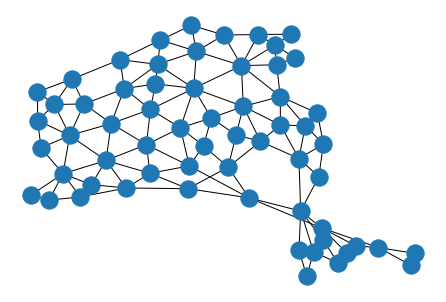

62


In [3]:
# create base graph
C = nx.Graph()
# All canadian + us border connections
# State and country colon-separated
C.add_edges_from([("Quebec:Canada", "Ontario:Canada"),
                  ("Quebec:Canada", "Newfoundland and Labrador:Canada"),
                  ("Quebec:Canada", "New Brunswick:Canada"),
                  ("Quebec:Canada", "Maine:US"),
                  ("Quebec:Canada", "Vermont:US"),
                  ("Quebec:Canada", "New York:US"),
                  ("New Brunswick:Canada", "Nova Scotia:Canada"),
                  ("New Brunswick:Canada", "Maine:US"),
                  ("Prince Edward Island:Canada", "Nova Scotia:Canada"),
                  ("Prince Edward Island:Canada", "New Brunswick:Canada"),
                  ("Manitoba:Canada", "Michigan:US"),
                  ("Manitoba:Canada", "North Dakota:US"),
                  ("Saskatchewan:Canada", "Manitoba:Canada"),
                  ("Saskatchewan:Canada", "Alberta:Canada"),
                  ("Saskatchewan:Canada", "Northwest Territories:Canada"),
                  ("Saskatchewan:Canada", "Montana:US"),
                  ("Saskatchewan:Canada", "North Dakota:US"),
                  ("Ontario:Canada", "Manitoba:Canada"),
                  ("Ontario:Canada", "New York:US"),
                  ("Ontario:Canada", "Michigan:US"),
                  ("Ontario:Canada", "Minnesota:US"),
                  ("Alberta:Canada", "Montana:US"),
                  ("Alberta:Canada", "British Columbia:Canada"),
                  ("Alberta:Canada", "Northwest Territories:Canada"),
                  ("British Columbia:Canada", "Washington:US"),
                  ("British Columbia:Canada", "Montana:US"),
                  ("British Columbia:Canada", "Idaho:US"),
                  ("British Columbia:Canada", "Yukon:Canada"),
                  ("British Columbia:Canada", "Alaska:US"),
                  ("British Columbia:Canada", "Northwest Territories:Canada"),
                  ("Northwest Territories:Canada", "Yukon:Canada"),
                  ("Yukon:Canada", "Alaska:US"),
                  ("Washington:US", "Idaho:US"),
                  ("Washington:US", "Oregon:US"),
                  ("Oregon:US", "California:US"),
                  ("Oregon:US", "Idaho:US"),
                  ("Oregon:US", "Nevada:US"),
                  ("California:US", "Nevada:US"),
                  ("California:US", "Arizona:US"),
                  ("Nevada:US", "Idaho:US"),
                  ("Nevada:US", "Utah:US"),
                  ("Nevada:US", "Arizona:US"),
                  ("Idaho:US", "Montana:US"),
                  ("Idaho:US", "Utah:US"),
                  ("Idaho:US", "Wyoming:US"),
                  ("Utah:US", "Arizona:US"),
                  ("Utah:US", "Colorado:US"),
                  ("Utah:US", "Wyoming:US"),
                  ("Arizona:US", "New Mexico:US"),
                  ("Montana:US", "North Dakota:US"),
                  ("Montana:US", "South Dakota:US"),
                  ("Montana:US", "Wyoming:US"),
                  ("Wyoming:US", "South Dakota:US"),
                  ("Wyoming:US", "Nebraska:US"),
                  ("Wyoming:US", "Colorado:US"),
                  ("Colorado:US", "Nebraska:US"),
                  ("Colorado:US", "Kansas:US"),
                  ("Colorado:US", "Oklahoma:US"),
                  ("Colorado:US", "New Mexico:US"),
                  ("New Mexico:US", "Oklahoma:US"),
                  ("New Mexico:US", "Texas:US"),
                  ("North Dakota:US", "Minnesota:US"),
                  ("North Dakota:US", "South Dakota:US"),
                  ("South Dakota:US", "Minnesota:US"),
                  ("South Dakota:US", "Iowa:US"),
                  ("South Dakota:US", "Nebraska:US"),
                  ("Nebraska:US", "Iowa:US"),
                  ("Nebraska:US", "Missouri:US"),
                  ("Nebraska:US", "Kansas:US"),
                  ("Kansas:US", "Missouri:US"),
                  ("Kansas:US", "Oklahoma:US"),
                  ("Oklahoma:US", "Missouri:US"),
                  ("Oklahoma:US", "Arkansas:US"),
                  ("Oklahoma:US", "Texas:US"),
                  ("Texas:US", "Arkansas:US"),
                  ("Texas:US", "Louisiana:US"),
                  ("Minnesota:US", "Wisconsin:US"),
                  ("Minnesota:US", "Iowa:US"),
                  ("Iowa:US", "Wisconsin:US"),
                  ("Iowa:US", "Illinois:US"),
                  ("Iowa:US", "Missouri:US"),
                  ("Missouri:US", "Illinois:US"),
                  ("Missouri:US", "Kentucky:US"),
                  ("Missouri:US", "Tennessee:US"),
                  ("Missouri:US", "Arkansas:US"),
                  ("Arkansas:US", "Tennessee:US"),
                  ("Arkansas:US", "Mississippi:US"),
                  ("Arkansas:US", "Louisiana:US"),
                  ("Louisiana:US", "Mississippi:US"),
                  ("Wisconsin:US", "Michigan:US"),
                  ("Wisconsin:US", "Illinois:US"),
                  ("Illinois:US", "Indiana:US"),
                  ("Illinois:US", "Kentucky:US"),
                  ("Mississippi:US", "Tennessee:US"),
                  ("Mississippi:US", "Alabama:US"),
                  ("Michigan:US", "Ohio:US"),
                  ("Michigan:US", "Indiana:US"),
                  ("Indiana:US", "Ohio:US"),
                  ("Indiana:US", "Kentucky:US"),
                  ("Kentucky:US", "Ohio:US"),
                  ("Kentucky:US", "West Virginia:US"),
                  ("Kentucky:US", "Virginia:US"),
                  ("Kentucky:US", "Tennessee:US"),
                  ("Tennessee:US", "Virginia:US"),
                  ("Tennessee:US", "North Carolina:US"),
                  ("Tennessee:US", "Georgia:US"),
                  ("Tennessee:US", "Alabama:US"),
                  ("Alabama:US", "Georgia:US"),
                  ("Alabama:US", "Florida:US"),
                  ("Ohio:US", "Pennsylvania:US"),
                  ("Ohio:US", "West Virginia:US"),
                  ("Georgia:US", "North Carolina:US"),
                  ("Georgia:US", "South Carolina:US"),
                  ("Georgia:US", "Florida:US"),
                  ("New York:US", "Vermont:US"),
                  ("New York:US", "Massachusetts:US"),
                  ("New York:US", "Connecticut:US"),
                  ("New York:US", "Pennsylvania:US"),
                  ("New York:US", "New Jersey:US"),
                  ("Pennsylvania:US", "New Jersey:US"),
                  ("Pennsylvania:US", "Delaware:US"),
                  ("Pennsylvania:US", "Maryland:US"),
                  ("Pennsylvania:US", "West Virginia:US"),
                  ("West Virginia:US", "Maryland:US"),
                  ("West Virginia:US", "Virginia:US"),
                  ("New Jersey:US", "Delaware:US"),
                  ("Delaware:US", "Maryland:US"),
                  ("Delaware:US", "District of Columbia:US"),
                  ("Maryland:US", "Virginia:US"),
                  ("Maryland:US", "West Virginia:US"),
                  ("Maryland:US", "District of Columbia:US"),
                  ("Virginia:US", "District of Columbia:US"),
                  ("Virginia:US", "North Carolina:US"),
                  ("North Carolina:US", "South Carolina:US"),
                  ("Vermont:US", "New Hampshire:US"),
                  ("Vermont:US", "Massachusetts:US"),
                  ("New Hampshire:US", "Maine:US"),
                  ("New Hampshire:US", "Massachusetts:US"),
                  ("Massachusetts:US", "Rhode Island:US"),
                  ("Massachusetts:US", "Connecticut:US"),
                  ("Connecticut:US", "Rhode Island:US")])

# "visualize" graph
nx.draw(C)
plt.show()
print(C.number_of_nodes())

In [4]:
# drop data for locations not in nodes
dfc = dfc[dfc.index.isin(C.nodes())]
dfd = dfd[dfd.index.isin(C.nodes())]

# reorder data based on node order
dfc = dfc.loc[list(C.nodes())]
dfd = dfd.loc[list(C.nodes())]

# normalize values to [0,1]
dfc = dfc / dfc.values.max()
dfd = dfd / dfd.values.max()

In [5]:
n_lags = 10
start_date = min(dfc.columns) + dt.timedelta(days=n_lags) # first day we can use as response
end_date = max(dfc.columns) # last day of data

In [6]:
# iterate over days and create graph with lagged node labels for each day
for date in pd.date_range(start_date, end_date):
    # get data in lag period
    start_lag = date - dt.timedelta(days=n_lags)
    lag_dates = dfc.columns[(dfc.columns < date) & (dfc.columns >= start_lag)]
    
    # create feature and response arrays
    features = np.concatenate((dfc[lag_dates].values, dfd[lag_dates].values), axis=1)
    targets = np.stack((dfc[date].values, dfd[date].values)).T
    
    # save feature and response arrays with original graph
    with open(f'model_ready_data/{str(date)[0:10]}.pkl', 'wb') as f:
        pickle.dump((C, features, targets), f)